In [1]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Ejercicios de Naive Bayes Classifiers

In [2]:
#El ejercicio del libro
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])


In [3]:
counts = {}
for label in np.unique(y):
# itera sobre cada una de las clases 
# identifica los arrayz que inicion con el 0 o con el 1 y los suma entre si y los guarda en la clase respectiva 
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))


Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Gaussian Naive Bayes


In [4]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB # importas del metodo 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

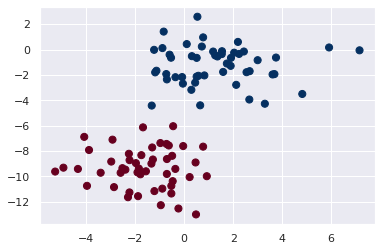

In [6]:
from sklearn.datasets import make_blobs #cargas los datos llamado make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5) # con los valores de make_blobs se ponen en X, Y que son nuestros valeres de entrenamiento 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu'); #Graficas los valores de make_blobs 

In [7]:
from sklearn.naive_bayes import GaussianNB #haces el metodo y lo entrenas con X y y
model = GaussianNB()
model.fit(X, y);

In [8]:
rng = np.random.RandomState(0) # creas nuevos datos en el rango de los valores demake_blobs
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew) # haces la predicción  de los valores de Xnew

In [9]:
yprob = model.predict_proba(Xnew) 
yprob[-8:].round(2) # te dice cual seria la categoría que pertenece los valores de Xnew (la probabilidad de pertenecer)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial Naive Bayes


In [10]:
from sklearn.datasets import fetch_20newsgroups #se carga los textos fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
categories = ['talk.religion.misc', 'soc.religion.christian', 
              'sci.space', 'comp.graphics'] # d documento fetch_20newsgroups se tomana las categorías talk.religion.misc', 'soc.religion.christian',  'sci.space', 'comp.graphics'
train = fetch_20newsgroups(subset='train', categories=categories) #haces tu conjunto de entrenamiento y test
test = fetch_20newsgroups(subset='test', categories=categories)

In [12]:
print(train.data[5]) #un ejemplo de como se ve un texto 

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer #convertir el contenido de cada cadena en un vector de números
from sklearn.naive_bayes import MultinomialNB #llamas el motodo
from sklearn.pipeline import make_pipeline #  make_pipeline Se comporta como la composición de funciones 

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) # pasas los textos a numeros y luego le aplicas el metodo  MultinomialNB

In [14]:
model.fit(train.data, train.target) #entrenas el metodo 
labels = model.predict(test.data) # ves como se comporta con el conjunto de prueba 

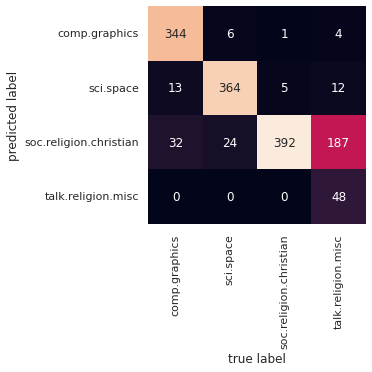

In [15]:
from sklearn.metrics import confusion_matrix # comparas la predición con la clase a la cual pertenece 
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
#haces una funcion para decir a que clase pertenece el Strings que le pases 
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
#se implementa la función 
predict_category('discussing islam vs atheism')


'soc.religion.christian'

In [18]:
predict_category('determining the screen resolution')

'comp.graphics'

# Decision Trees

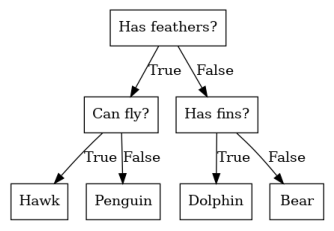

In [19]:
#se carga un ejemplo de Decision Tree  el cual quiere clasificar los animales Hawk, Penguin, Dolphin Bear 
import mglearn

mglearn.plots.plot_animal_tree()

# Cáncer de mama.
hacer crecer el árbol hasta
todas las hojas son puras

In [20]:
import pandas as pd
import random
from sklearn.datasets import load_breast_cancer #descarga los datos del cancer 
from sklearn.model_selection import train_test_split  #descarga la  model para entrenar 
from sklearn.tree import DecisionTreeClassifier#descarga la funcion para crear un arbol 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)#divide mi documento en entrenamiento y prueba
tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)  #crea un arbol con los datos de entrenamiento
print("Precisión en el conjunto de entrenamiento: {:.3f}".format(tree.score(X_train, y_train))) #te dice la precision
print("Precisión en el equipo de prueba: {:.3f}".format(tree.score(X_test, y_test)))
# los árboles sin podar son propensos a sobreajustar.

Precisión en el conjunto de entrenamiento: 1.000
Precisión en el equipo de prueba: 0.937


Ahora apliquemos la poda previa al árbol, Una opción es dejar de construir el
árbol después de que se haya alcanzado una cierta profundidad.
Aquí establecemos max_depth = 4, es decir, solose pueden hacer cuatro preguntas consecutivas

In [21]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0) #comando para podar un arbol (con una profundidad o de 4 )
tree.fit(X_train, y_train)
print("Precisión en el conjunto de entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en el equipo de prueba: {:.3f}".format(tree.score(X_test, y_test)))

Precisión en el conjunto de entrenamiento: 0.995
Precisión en el equipo de prueba: 0.951


Limitando la profundidad del árbol disminuye el sobreajuste. Esto conduce a una menor precisión en el entrenamiento.
conjunto, pero una mejora en el conjunto de prueba

# Analyzing decision trees

Podemos visualizar el árbol usando la función export_graphviz del  tree module.
Esto escribe un archivo en formato de archivo .dot, que es un formato de archivo de texto para almacenar gráficos.

In [22]:
#con estos comandos se instala graphviz
# conda remove graphviz
# conda install python-graphviz

In [23]:
from sklearn.tree import export_graphviz #llamas el model que ayuda a graficar
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], #le pones nombre a tus clases
#se guarda el arbol en el documento tree.dot
feature_names=cancer.feature_names, impurity=False, filled=True) 

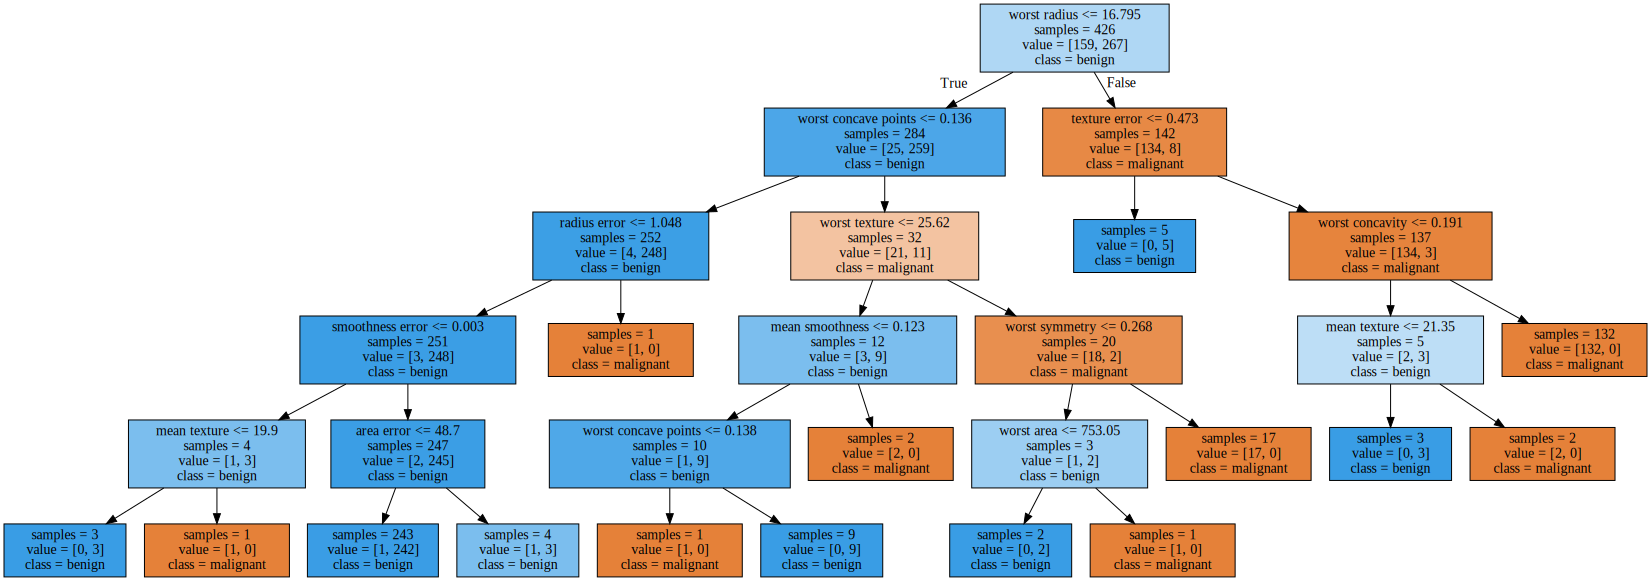

In [24]:
import graphviz  #se lee el archivo tree.dot y se grafica 
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

En lugar de mirar todo el árbol, lo que puede resultar agotador, hay algunas propiedades útiles
erties que podemos derivar para resumir el funcionamiento del árbol. Lo mas común
El resumen utilizado es la importancia de la característica, que califica la importancia de cada característica para
la decisión que toma un árbol

In [25]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.
 0.         0.         0.70786451 0.03236422 0.         0.00680904
 0.         0.         0.01771345 0.1281193  0.01157537 0.        ]


Podemos visualizar la importancia de las características

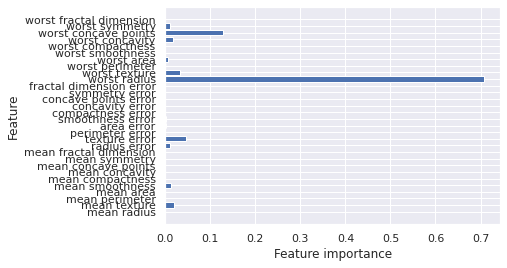

In [26]:
def plot_feature_importances_cancer(model): #se grafica los datos anteriores 
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


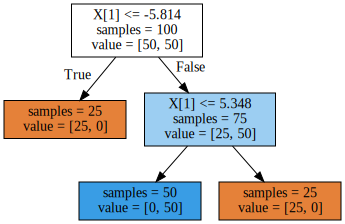

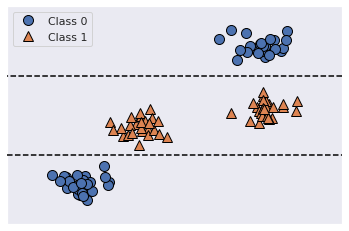

In [27]:
tree = mglearn.plots.plot_tree_not_monotone() #otro ejemplo de un arbol, en este se llegana a hojas puras de manera rapida 
display(tree)

# Decision tree Regressor

In [28]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ram_price.csv'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = np.reshape(data_train.date.values, (-1, 1)) #nuestros datos de -1 a 1 

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#predict all data
X_all = np.reshape(ram_prices.date.values, (-1, 1)) #

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [ ]:

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

# Random Forest: clasificación de las lunas (dataset: two_moons)

In [ ]:

#el siguiente random forest consiste en 5 árboles
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

#se tomará una muestra de 100 datos
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

#se construirán 5 árboles
forest = RandomForestClassifier(n_estimaload_breast_cancertors=5, random_state=2)
forest.fit(X_train, y_train)load_breast_cancer

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# Random forest: clasificación de tumores (dataset: cancer)

In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=75, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


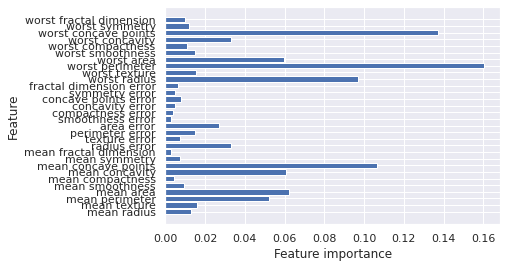

In [33]:
plot_feature_importances_cancer(forest)

# Gradient boosted regression trees


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Modificando la variable max_depth

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

----Modificando la variable learning_rate

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)